# 08 - Histograms

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../../Data/diamonds.csv')
df.shape

(53940, 10)

In [3]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Matplotlib histograms

Now, let's look at numeric variables in the diamond data set: width (in mm).

Matplotlib has `hist`, while seaborn's histogram function is `histplot`. Both work in similar ways. 

By default, matplotlib will split the data into 10 bins, which is usually too few. In addition, the bin boundaries are not aligned with the tick marks. This is confusing!

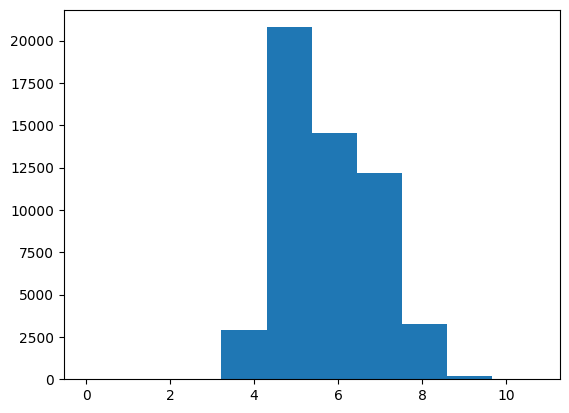

In [4]:
plt.hist(data=df, x='x');

To solve this, we want to use the `bins` parameter. If we supply an integer value, that's the nubmer of bins to use.

You can see the bin edges and counts return by hist when I remove the semicolon.

(array([8.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+01, 2.9040e+03,
        1.0805e+04, 6.2180e+03, 5.2290e+03, 6.5700e+03, 6.5130e+03,
        7.1620e+03, 3.1020e+03, 2.9260e+03, 1.3240e+03, 9.5100e+02,
        1.5600e+02, 2.9000e+01, 7.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([ 0.    ,  0.4296,  0.8592,  1.2888,  1.7184,  2.148 ,  2.5776,
         3.0072,  3.4368,  3.8664,  4.296 ,  4.7256,  5.1552,  5.5848,
         6.0144,  6.444 ,  6.8736,  7.3032,  7.7328,  8.1624,  8.592 ,
         9.0216,  9.4512,  9.8808, 10.3104, 10.74  ]),
 <BarContainer object of 25 artists>)

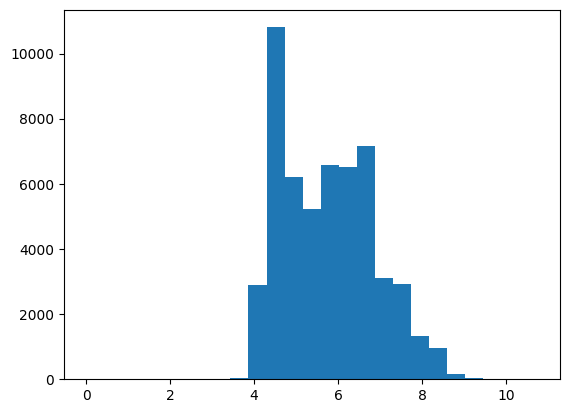

In [5]:
plt.hist(data=df, x='x', bins=25)

### Specifying bin boundaries

You can also specify the bin boundaries explicitly by providing `bins` a list.

For the numpy `arange` function: the first argument is the minimum value, the second is the maximum value. The third argument gives the step-size for the bins.

I will add 1/4mm to the second argument. This is because the values generated by arange _do not_ include the maximum value.

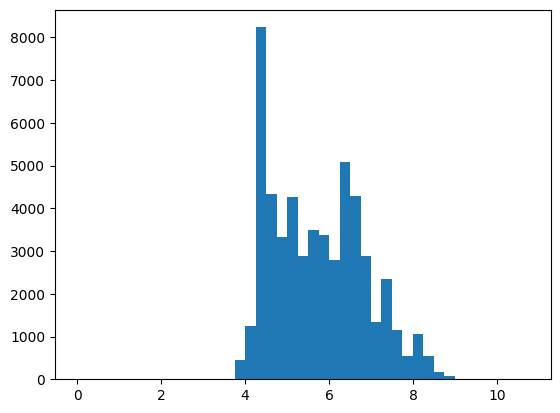

In [6]:
bins = np.arange(0, df['x'].max()+0.25, 0.25)
plt.hist(data=df, x='x', bins=bins);

What happens if we try an extremely small bin size? Like one? On the one hand, this bin size is perhaps a bit too small, introducing a lot of noise in the plot.

On the other hand, this does a good job of showing that many diamonds listings are probably rounded to some nearest value.

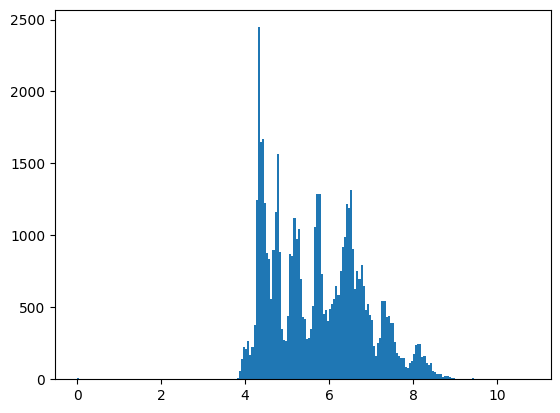

In [7]:
bins = np.arange(0, df['x'].max()+0.05, 0.05)
plt.hist(data=df, x='x', bins=bins);

## Seaborn histograms

Seaborn also has a function for creating histograms, histogram. It works just like matplotlib.

The default bin count is larger than in matplotlib. Also, you can automatically normalize the plot with the parameter `stat=percent`.

You can also add a kernel density estimate (KDE), which is an estimate of the density of the data distribution, with the total area underneath the curve set to be = 1.

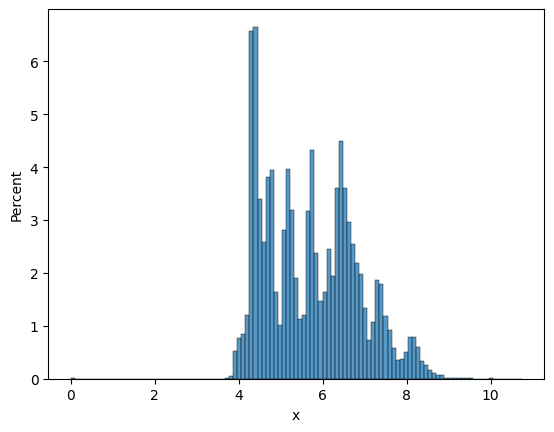

In [8]:
sns.histplot(data=df, x='x', stat='percent');

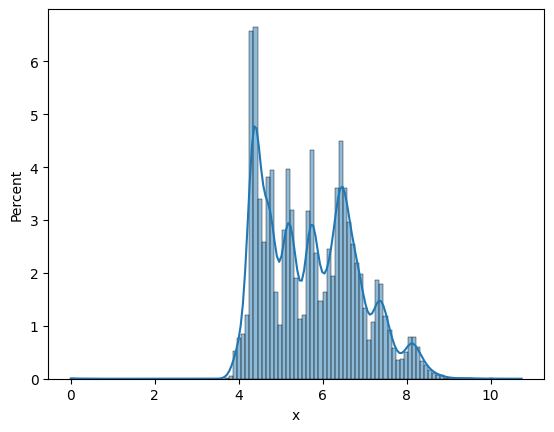

In [9]:
sns.histplot(data=df, x='x', stat='percent', kde=True);